<a href="https://colab.research.google.com/github/OIZHENHAU/HackerSquad/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [ ]:
DIR = "/content/oil_and_gas_data (1).csv"
data=pd.read_csv(DIR)
data

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.9000,24.7000,23.8900,24.3900,32509,USD
1,Brent Oil,2000-01-05,24.2500,24.3700,23.7000,23.7300,30310,USD
2,Brent Oil,2000-01-06,23.5500,24.2200,23.3500,23.6200,44662,USD
3,Brent Oil,2000-01-07,23.5700,23.9800,23.0500,23.0900,34826,USD
4,Brent Oil,2000-01-10,23.0400,23.7800,23.0400,23.7300,26388,USD
...,...,...,...,...,...,...,...,...
23019,Heating Oil,2022-06-13,4.3612,4.3762,4.1949,4.2834,46406,USD
23020,Heating Oil,2022-06-14,4.2749,4.4570,4.2488,4.3940,36652,USD
23021,Heating Oil,2022-06-15,4.3816,4.6070,4.3557,4.5470,36908,USD
23022,Heating Oil,2022-06-16,4.5320,4.5825,4.4124,4.5713,28269,USD


In [ ]:
data=data[['Date','Close']]
data

,Date,Close
0,2000-01-04,24.3900
1,2000-01-05,23.7300
2,2000-01-06,23.6200
3,2000-01-07,23.0900
4,2000-01-10,23.7300
...,...,...
23019,2022-06-13,4.2834
23020,2022-06-14,4.3940
23021,2022-06-15,4.5470
23022,2022-06-16,4.5713


<ipython-input-31-27440ea654b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


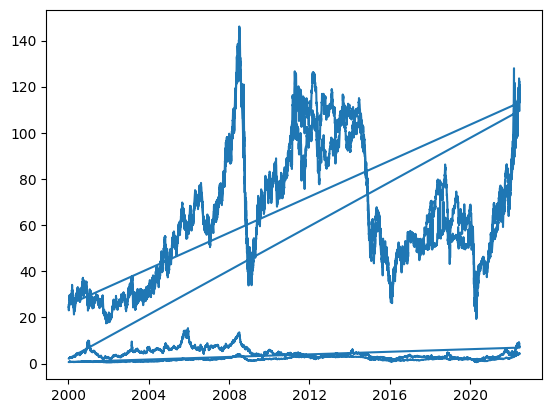

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2000-01-13,24.9800,24.8100,24.6200,23.7300,23.0900,23.6200,23.7300,24.3900
2000-01-14,25.4700,24.9800,24.8100,24.6200,23.7300,23.0900,23.6200,23.7300
2000-01-17,25.6500,25.4700,24.9800,24.8100,24.6200,23.7300,23.0900,23.6200
2000-01-18,26.0500,25.6500,25.4700,24.9800,24.8100,24.6200,23.7300,23.0900
2000-01-19,25.8400,26.0500,25.6500,25.4700,24.9800,24.8100,24.6200,23.7300
...,...,...,...,...,...,...,...,...
2022-06-13,4.2834,4.3667,4.4037,4.3143,4.3206,4.3601,4.2803,4.2084
2022-06-14,4.3940,4.2834,4.3667,4.4037,4.3143,4.3206,4.3601,4.2803
2022-06-15,4.5470,4.3940,4.2834,4.3667,4.4037,4.3143,4.3206,4.3601


In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[24.98  , 24.81  , 24.62  , ..., 23.62  , 23.73  , 24.39  ],
       [25.47  , 24.98  , 24.81  , ..., 23.09  , 23.62  , 23.73  ],
       [25.65  , 25.47  , 24.98  , ..., 23.73  , 23.09  , 23.62  ],
       ...,
       [ 4.547 ,  4.394 ,  4.2834, ...,  4.3143,  4.3206,  4.3601],
       [ 4.5713,  4.547 ,  4.394 , ...,  4.4037,  4.3143,  4.3206],
       [ 4.3398,  4.5713,  4.547 , ...,  4.3667,  4.4037,  4.3143]])

In [ ]:
shifted_df_as_np.shape

(23017, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.66368892, -0.66602441, -0.66863466, ..., -0.6823728 ,
        -0.6808616 , -0.67179443],
       [-0.65695724, -0.66368892, -0.66602441, ..., -0.68965401,
        -0.6823728 , -0.6808616 ],
       [-0.65448437, -0.65695724, -0.66368892, ..., -0.6808616 ,
        -0.68965401, -0.6823728 ],
       ...,
       [-0.94440037, -0.9465023 , -0.94802174, ..., -0.94759723,
        -0.94751068, -0.94696803],
       [-0.94406653, -0.94440037, -0.9465023 , ..., -0.94636904,
        -0.94759723, -0.94751068],
       [-0.94724691, -0.94406653, -0.94440037, ..., -0.94687735,
        -0.94636904, -0.94759723]])

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((23017, 7), (23017,))

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[-0.67179443, -0.6808616 , -0.6823728 , ..., -0.6808616 ,
        -0.66863466, -0.66602441],
       [-0.6808616 , -0.6823728 , -0.68965401, ..., -0.66863466,
        -0.66602441, -0.66368892],
       [-0.6823728 , -0.68965401, -0.6808616 , ..., -0.66602441,
        -0.66368892, -0.65695724],
       ...,
       [-0.94696803, -0.94751068, -0.94759723, ..., -0.94687735,
        -0.94802174, -0.9465023 ],
       [-0.94751068, -0.94759723, -0.94636904, ..., -0.94802174,
        -0.9465023 , -0.94440037],
       [-0.94759723, -0.94636904, -0.94687735, ..., -0.9465023 ,
        -0.94440037, -0.94406653]])

In [ ]:
split_index = int(len(X) * 0.7)

split_index
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16111, 7), (6906, 7), (16111,), (6906,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16111, 7, 1), (6906, 7, 1), (16111, 1), (6906, 1))

In [ ]:
import torch
import torch.nn as nn
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape


(torch.Size([16111, 7, 1]),
 torch.Size([6906, 7, 1]),
 torch.Size([16111, 1]),
 torch.Size([6906, 1]))

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
def compute_mse(model, data_loader, loss_function):
    total_loss = 0.0
    num_samples = 0
    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch[0].to(device), batch[1].to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            num_samples += inputs.size(0)
    return total_loss / num_samples

In [ ]:
def compute_accuracy(model, data_loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in data_loader:
            inputs, labels = batch[0].to(device), batch[1].to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [ ]:
learning_rate = 0.001
num_epochs = 5
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    train_mse = compute_mse(model, train_loader, loss_function)
    print(f'Train MSE after epoch {epoch + 1}: {train_mse}')


    validate_one_epoch()
    validation_mse = compute_mse(model, test_loader, loss_function)
    print(f'Validation MSE after epoch {epoch + 1}: {validation_mse}')


Epoch: 1
Batch 100, Loss: 0.294
Batch 200, Loss: 0.189
Batch 300, Loss: 0.065
Batch 400, Loss: 0.018
Batch 500, Loss: 0.013
Batch 600, Loss: 0.010
Batch 700, Loss: 0.007
Batch 800, Loss: 0.005
Batch 900, Loss: 0.004
Batch 1000, Loss: 0.003

Train MSE after epoch 1: 0.0021562980797049185
Val Loss: 0.001
***************************************************

Validation MSE after epoch 1: 0.0007755714985623925
Epoch: 2
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002
Batch 300, Loss: 0.001
Batch 400, Loss: 0.004
Batch 500, Loss: 0.002
Batch 600, Loss: 0.001
Batch 700, Loss: 0.001
Batch 800, Loss: 0.001
Batch 900, Loss: 0.001
Batch 1000, Loss: 0.002

Train MSE after epoch 2: 0.0014872143088812953
Val Loss: 0.000
***************************************************

Validation MSE after epoch 2: 4.022082543269763e-05
Epoch: 3
Batch 100, Loss: 0.001
Batch 200, Loss: 0.001
Batch 300, Loss: 0.002
Batch 400, Loss: 0.002
Batch 500, Loss: 0.002
Batch 600, Loss: 0.001
Batch 700, Loss: 0.001
Batch 800, L

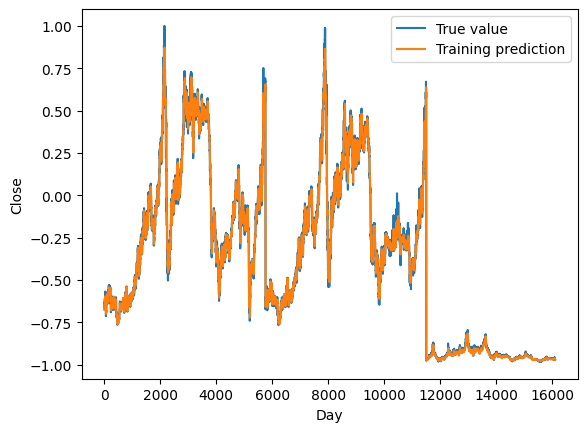

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='True value')
plt.plot(predicted, label='Training prediction')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

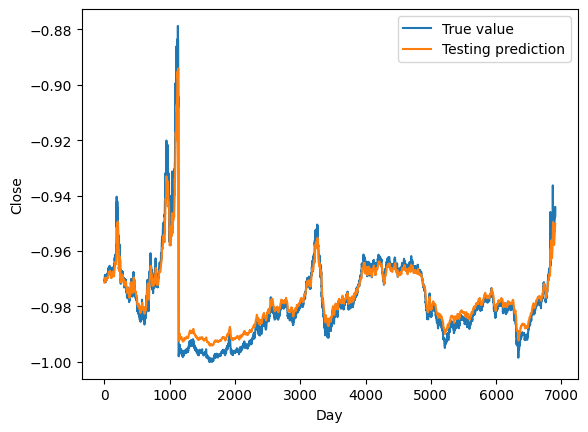

In [ ]:
with torch.no_grad():
    predicted = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='True value')
plt.plot(predicted, label='Testing prediction')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
# check performance
from sklearn import metrics
import numpy as np
metrics_df = pd.DataFrame ({'Metric':
['MAE',
'MSE',
'RMSE',
'R-Squared'], 'Value':
[metrics.mean_absolute_error(y_test, predicted),
metrics.mean_squared_error (y_test, predicted),
np.sqrt (metrics.mean_squared_error (y_test, predicted)),
metrics.explained_variance_score (y_test, predicted)]}).round(3)
print("Performance : ")
print(metrics_df)

Performance : 
      Metric  Value
0        MAE  0.003
1        MSE  0.000
2       RMSE  0.004
3  R-Squared  0.943
